In [ ]:
# LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install hvplot panel
!pip install jupyter_bokeh
!pip install geoviews bokeh

# interactive plots
import panel as pn
import hvplot.pandas  # hvplot integrates nicely with Panel

# geospatial / mapping
import geopandas as gpd      # for shapefiles or geospatial data
from shapely.geometry import Point  # to create points from lat/lon

# color palettes
import matplotlib.cm as cm
import matplotlib.colors as colors

# panel initialization for notebooks
pn.extension('hvplot')

import hvplot.pandas
import holoviews as hv

In [ ]:
# DATA

# _4 are files with snow(ottawa/vancouver) and pressure(others) removed to only contain columns present in all 6 datasets
df_cotonou = pd.read_csv('cotonou_4.csv')
df_ottawa = pd.read_csv('ottawa_4.csv',encoding='iso-8859-1')
df_parakou = pd.read_csv('parakou_4.csv')
df_plaisance = pd.read_csv('plaisance_4.csv')
df_vacoas = pd.read_csv('vacoas_4.csv')
df_vancouver = pd.read_csv('vancouver_4.csv', encoding='iso-8859-1')

df_cotonou_ = pd.read_csv('cotonou_clean.csv',encoding='iso-8859-1')
df_ottawa_ = pd.read_csv('ottawa_clean.csv',encoding='iso-8859-1')
df_parakou_ = pd.read_csv('parakou_clean.csv',encoding='iso-8859-1')
df_plaisance_ = pd.read_csv('plaisance_clean.csv',encoding='iso-8859-1')
df_vacoas_ = pd.read_csv('vacoas_clean.csv',encoding='iso-8859-1')
df_vancouver_ = pd.read_csv('vancouver_clean.csv', encoding='iso-8859-1')

# ---- FIX DATE FORMATS FOR AFRICAN CITIES (DD/MM/YYYY) ----
df_cotonou_['Date']   = pd.to_datetime(df_cotonou_['Date'],   format='%d/%m/%Y', errors='coerce')
df_parakou_['Date']   = pd.to_datetime(df_parakou_['Date'],   format='%d/%m/%Y', errors='coerce')
df_plaisance_['Date'] = pd.to_datetime(df_plaisance_['Date'], format='%d/%m/%Y', errors='coerce')
df_vacoas_['Date']    = pd.to_datetime(df_vacoas_['Date'],    format='%d/%m/%Y', errors='coerce')

# ---- CANADIAN CITIES USE DEFAULT (MM/DD/YYYY) ----
df_ottawa_['Date']    = pd.to_datetime(df_ottawa_['Date'],    errors='coerce')
df_vancouver_['Date'] = pd.to_datetime(df_vancouver_['Date'], errors='coerce')

# Convert dates for the '_4.csv' datasets too
df_cotonou['Date']   = pd.to_datetime(df_cotonou['Date'],   format='%d/%m/%Y', errors='coerce')
df_parakou['Date']   = pd.to_datetime(df_parakou['Date'],   format='%d/%m/%Y', errors='coerce')
df_plaisance['Date'] = pd.to_datetime(df_plaisance['Date'], format='%d/%m/%Y', errors='coerce')
df_vacoas['Date']    = pd.to_datetime(df_vacoas['Date'],    format='%d/%m/%Y', errors='coerce')

df_ottawa['Date']    = pd.to_datetime(df_ottawa['Date'],    errors='coerce')
df_vancouver['Date'] = pd.to_datetime(df_vancouver['Date'], errors='coerce')

In [ ]:
# COMBINE

# Add a 'City' column to each dataset
df_cotonou['City'] = 'Cotonou'
df_parakou['City'] = 'Parakou'
df_plaisance['City'] = 'Plaisance'
df_vacoas['City'] = 'Vacoas'
df_ottawa['City'] = 'Ottawa'
df_vancouver['City'] = 'Vancouver'
df_cotonou_['City'] = 'Cotonou'
df_parakou_['City'] = 'Parakou'
df_plaisance_['City'] = 'Plaisance'
df_vacoas_['City'] = 'Vacoas'
df_ottawa_['City'] = 'Ottawa'
df_vancouver_['City'] = 'Vancouver'

# combination
df_all = pd.concat([df_cotonou, df_parakou, df_plaisance, df_vacoas, df_ottawa, df_vancouver],
                   ignore_index=True)
df_canada = pd.concat([df_ottawa_, df_vancouver_],
                   ignore_index=True)
df_others = pd.concat([df_cotonou_, df_parakou_, df_plaisance_, df_vacoas_],
                   ignore_index=True)

# Create YearMonth column for monthly aggregation
df_all['YearMonth'] = df_all['Date'].dt.to_period('M').dt.to_timestamp()
df_canada['YearMonth'] = df_canada['Date'].dt.to_period('M').dt.to_timestamp()
df_others['YearMonth'] = df_others['Date'].dt.to_period('M').dt.to_timestamp()

# Quick check
print("Canadian cities:", df_canada['City'].unique())
print("Other cities:", df_others['City'].unique())

Canadian cities: ['Ottawa' 'Vancouver']
Other cities: ['Cotonou' 'Parakou' 'Plaisance' 'Vacoas']


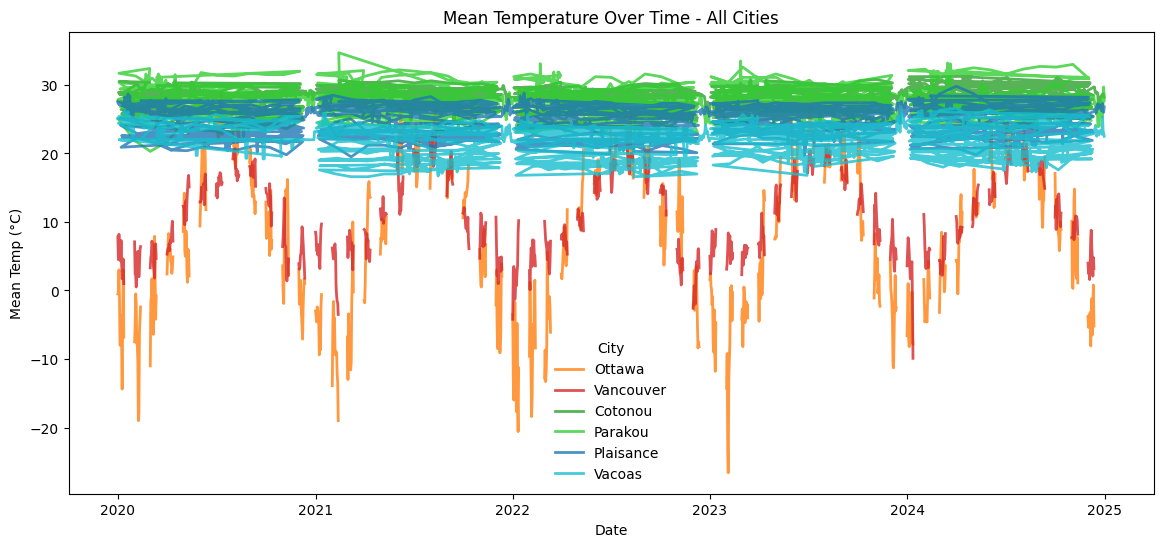

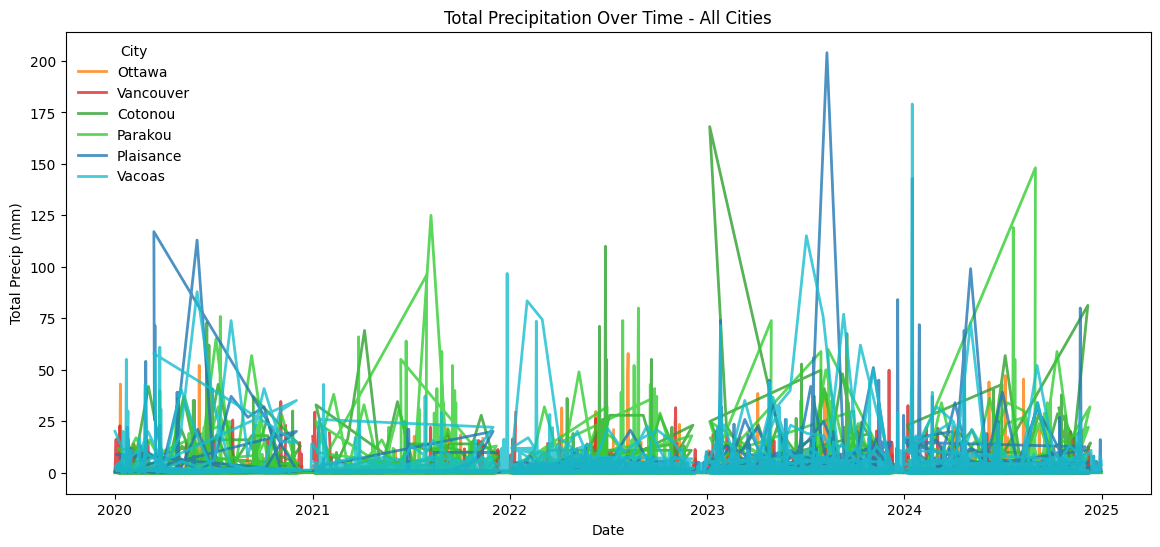

/tmp/ipython-input-3410306971.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='City', y='Mean Temp (°C)', palette=city_colors)


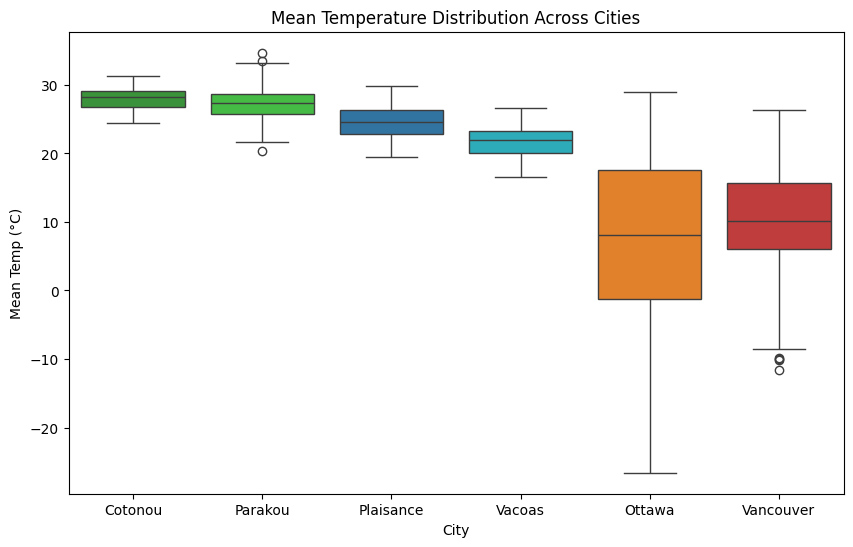

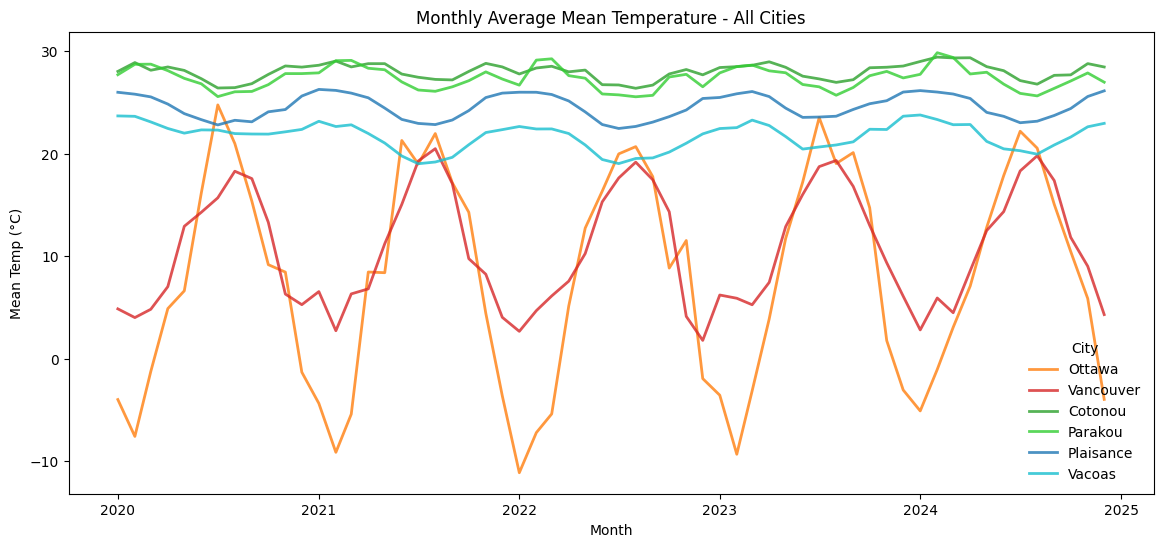

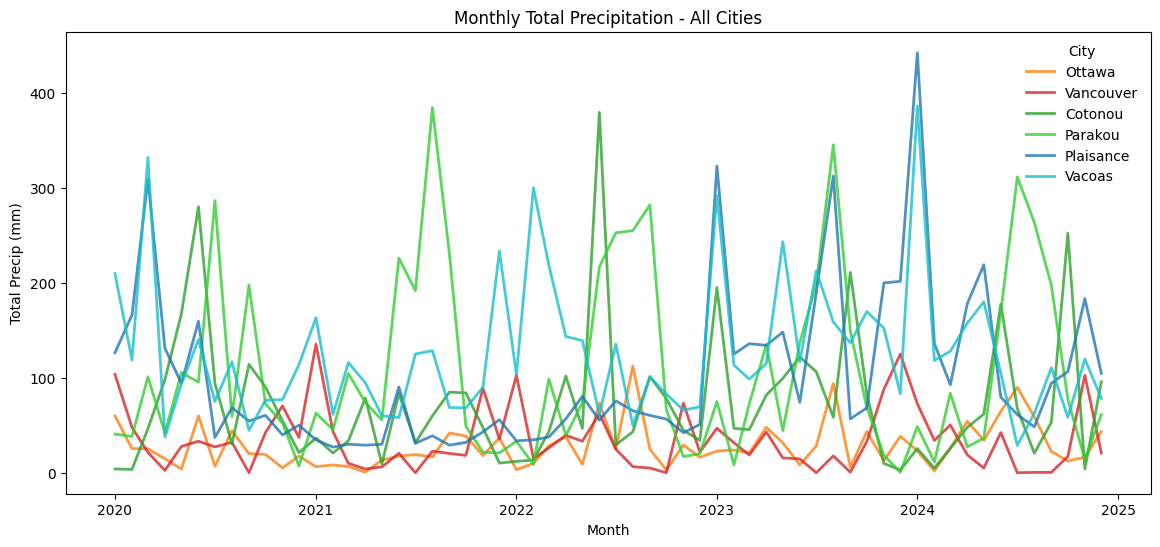

In [ ]:
# CROSS-CITY COMPARATIVE PLOTS

alpha_level = 0.8  # default line transparency

# City color mapping (distinct, high-contrast)
city_colors = {
    'Ottawa': '#ff7f0e',       # Orange (Canada)
    'Vancouver': '#d62728',    # Red (Canada)
    'Cotonou': '#2ca02c',      # Green (Benin)
    'Parakou': '#32cd32',      # Lime Green (Benin)
    'Plaisance': '#1f77b4',    # Blue (Mauritius)
    'Vacoas': '#17becf'        # Cyan/Teal (Mauritius)
}

# --- 1. Multi-line Temperature Plot (Mean Temp) ---
plt.figure(figsize=(14,6))
for city in city_colors:
    df_city = df_all[df_all['City']==city]
    plt.plot(df_city['Date'], df_city['Mean Temp (°C)'],
             label=city, color=city_colors[city],
             linewidth=2, alpha=alpha_level)
plt.title("Mean Temperature Over Time - All Cities")
plt.xlabel("Date")
plt.ylabel("Mean Temp (°C)")
plt.legend(title='City', frameon=False)
plt.show()

# --- 2. Multi-line Precipitation Plot ---
plt.figure(figsize=(14,6))
for city in city_colors:
    df_city = df_all[df_all['City']==city]
    plt.plot(df_city['Date'], df_city['Total Precip (mm)'],
             label=city, color=city_colors[city],
             linewidth=2, alpha=alpha_level)
plt.title("Total Precipitation Over Time - All Cities")
plt.xlabel("Date")
plt.ylabel("Total Precip (mm)")
plt.legend(title='City', frameon=False)
plt.show()

# --- 3. Boxplot Across Cities for Mean Temp ---
plt.figure(figsize=(10,6))
sns.boxplot(data=df_all, x='City', y='Mean Temp (°C)', palette=city_colors)
plt.title("Mean Temperature Distribution Across Cities")
plt.ylabel("Mean Temp (°C)")
plt.show()

# --- 4. Monthly Average Mean Temp per City ---
monthly_mean_temp = df_all.groupby(['YearMonth','City'])['Mean Temp (°C)'].mean().reset_index()

plt.figure(figsize=(14,6))
for city in city_colors:
    df_city = monthly_mean_temp[monthly_mean_temp['City']==city]
    plt.plot(df_city['YearMonth'], df_city['Mean Temp (°C)'],
             label=city, color=city_colors[city],
             linewidth=2, alpha=alpha_level)
plt.title("Monthly Average Mean Temperature - All Cities")
plt.xlabel("Month")
plt.ylabel("Mean Temp (°C)")
plt.legend(title='City', frameon=False)
plt.show()

# --- 5. Monthly Total Precipitation per City ---
monthly_total_precip = df_all.groupby(['YearMonth','City'])['Total Precip (mm)'].sum().reset_index()

plt.figure(figsize=(14,6))
for city in city_colors:
    df_city = monthly_total_precip[monthly_total_precip['City']==city]
    plt.plot(df_city['YearMonth'], df_city['Total Precip (mm)'],
             label=city, color=city_colors[city],
             linewidth=2, alpha=alpha_level)
plt.title("Monthly Total Precipitation - All Cities")
plt.xlabel("Month")
plt.ylabel("Total Precip (mm)")
plt.legend(title='City', frameon=False)
plt.show()

In [ ]:
# Normalize column names
def normalize_cols(df):
    df = df.copy()
    df.columns = (df.columns
                    .str.strip()
                    .str.lower()
                    .str.replace(r'[^\w\s]', '', regex=True)
                    .str.replace(r'\s+', '_', regex=True))
    return df

df_canada = normalize_cols(df_canada)
df_others = normalize_cols(df_others)

In [ ]:
# KPI - Canada

kpi_canada = df_canada.groupby('city').apply(lambda g: pd.Series({
    'Avg Mean Temp (°C)': g['mean_temp_c'].mean(),
    'Max Temp Recorded (°C)': g['max_temp_c'].max(),
    'Min Temp Recorded (°C)': g['min_temp_c'].min(),
    'Temp Range (°C)': g['max_temp_c'].max() - g['min_temp_c'].min(),
    'Total Precip (mm)': g['total_precip_mm'].sum(),
    'Avg Wind Gust (km/h)': g['spd_of_max_gust_kmh'].mean(),
    'Rainy Days (# > 0 mm)': (g['total_precip_mm'] > 0).sum(),
    'Total Snow (cm)': g['total_snow_cm'].sum(),
    'Max Daily Snow (cm)': g['total_snow_cm'].max()
})).round(2)

kpi_canada

/tmp/ipython-input-1834359731.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kpi_canada = df_canada.groupby('city').apply(lambda g: pd.Series({


,Avg Mean Temp (°C),Max Temp Recorded (°C),Min Temp Recorded (°C),Temp Range (°C),Total Precip (mm),Avg Wind Gust (km/h),Rainy Days (# > 0 mm),Total Snow (cm),Max Daily Snow (cm)
city,,,,,,,,,
Ottawa,7.53,36.9,-33.1,70.0,4558.60,44.20,762.0,1047.10,47.8
Vancouver,10.64,32.4,-15.3,47.7,5601.58,41.22,818.0,242.48,27.8


In [ ]:
# KPI - others

kpi_others = df_others.groupby('city').apply(lambda g: pd.Series({
    'Avg Mean Temp (°C)': g['mean_temp_c'].mean(),
    'Max Temp Recorded (°C)': g['max_temp_c'].max(),
    'Min Temp Recorded (°C)': g['min_temp_c'].min(),
    'Temp Range (°C)': g['max_temp_c'].max() - g['min_temp_c'].min(),
    'Total Precip (mm)': g['total_precip_mm'].sum(),
    'Avg Wind Gust (km/h)': g['spd_of_max_gust_kmh'].mean(),
    'Rainy Days (# > 0 mm)': (g['total_precip_mm'] > 0).sum(),
    'Avg Pressure (hPa)': g['pressure'].mean()
})).round(2)

kpi_others

/tmp/ipython-input-3175838095.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kpi_others = df_others.groupby('city').apply(lambda g: pd.Series({


,Avg Mean Temp (°C),Max Temp Recorded (°C),Min Temp Recorded (°C),Temp Range (°C),Total Precip (mm),Avg Wind Gust (km/h),Rainy Days (# > 0 mm),Avg Pressure (hPa)
city,,,,,,,,
Cotonou,27.99,36.0,19.6,16.4,4411.70,0.00,501.0,0.00
Parakou,27.34,41.0,13.6,27.4,6485.50,0.00,1348.0,0.00
Plaisance,24.58,34.0,14.0,20.0,6134.75,38.42,1493.0,1016.92
Vacoas,21.69,34.0,11.9,22.1,7603.05,0.00,1427.0,1017.32


In [ ]:
# GEOGRAPHIC MAP - CITY MARKERS

# Define city coordinates (latitude, longitude)
city_coords = {
    'ottawa': (45.4215, -75.6972),
    'vancouver': (49.2827, -123.1207),
    'cotonou': (6.3703, 2.3912),
    'parakou': (9.3376, 2.6316),
    'plaisance': (-20.3139, 57.6986),
    'vacoas': (-20.2897, 57.4828)
}

# Helper function to compute KPIs for mapping
def compute_kpi(df, is_canada=True):
    if is_canada:
        return df.groupby('city').agg(
            avg_mean_temp=('mean_temp_c', 'mean'),
            total_precip=('total_precip_mm', 'sum'),
            avg_wind_gust=('spd_of_max_gust_kmh', 'mean'),
            snow=('total_snow_cm', 'sum')
        ).reset_index()
    else:
        return df.groupby('city').agg(
            avg_mean_temp=('mean_temp_c', 'mean'),
            total_precip=('total_precip_mm', 'sum'),
            avg_wind_gust=('spd_of_max_gust_kmh', 'mean'),
            pressure=('pressure', 'mean')
        ).reset_index()

# Compute KPIs
kpi_canada_map = compute_kpi(df_canada, is_canada=True)
kpi_others_map = compute_kpi(df_others, is_canada=False)

# Add coordinates (lat/lon)
for df in [kpi_canada_map, kpi_others_map]:
    df['lat'] = df['city'].str.lower().map(lambda c: city_coords[c][0])
    df['lon'] = df['city'].str.lower().map(lambda c: city_coords[c][1])

# Add country info
kpi_canada_map['country'] = 'Canada'
kpi_others_map['country'] = kpi_others_map['city'].map({
    'cotonou': 'Benin',
    'parakou': 'Benin',
    'plaisance': 'Mauritius',
    'vacoas': 'Mauritius'
})

# Build tooltip dynamically
kpi_canada_map['tooltip'] = kpi_canada_map.apply(
    lambda r: f"{r['city'].title()} ({r['country']})\n"
              f"Avg Temp: {r['avg_mean_temp']:.1f}°C\n"
              f"Total Precip: {r['total_precip']:.1f} mm\n"
              f"Avg Wind Gust: {r['avg_wind_gust']:.1f} km/h\n"
              f"Snow: {r['snow']:.1f} cm", axis=1
)

kpi_others_map['tooltip'] = kpi_others_map.apply(
    lambda r: f"{r['city'].title()} ({r['country']})\n"
              f"Avg Temp: {r['avg_mean_temp']:.1f}°C\n"
              f"Total Precip: {r['total_precip']:.1f} mm\n"
              f"Avg Wind Gust: {r['avg_wind_gust']:.1f} km/h\n"
              f"Pressure: {r['pressure']:.1f} hPa", axis=1
)

# Combine all cities into a single DataFrame
map_df = pd.concat([kpi_canada_map, kpi_others_map], ignore_index=True)

# Convert to GeoDataFrame
gdf_map = gpd.GeoDataFrame(map_df, geometry=gpd.points_from_xy(map_df['lon'], map_df['lat']))

# Plot interactive map with city-specific colors and legend
gdf_map.hvplot.points(
    x='lon', y='lat', geo=True, size=100, color='city',
    cmap=city_colors,  # use your predefined city colors
    hover_cols=['tooltip'], tiles='CartoLight',
    frame_width=900, frame_height=500, legend='right'
)

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [lon,lat]   (city,tooltip)

In [ ]:
# MULTI-CITY DATASET

# Step 1: Add missing columns before KPI aggregation
df_canada['pressure'] = np.nan         # Canada has no pressure
df_others['total_snow_cm'] = np.nan    # Others have no snow

# Step 2: Compute KPIs for Canada (keeping total snow)
kpi_canada_map = df_canada.groupby('city').agg(
    avg_mean_temp=('mean_temp_c', 'mean'),
    total_precip=('total_precip_mm', 'sum'),
    avg_max_wind_gust=('spd_of_max_gust_kmh', 'mean'),
    total_snow_cm=('total_snow_cm', 'sum'),
    avg_pressure=('pressure', 'mean')  # will be NaN
).reset_index()

# Step 3: Compute KPIs for other cities (keeping pressure)
kpi_others_map = df_others.groupby('city').agg(
    avg_mean_temp=('mean_temp_c', 'mean'),
    total_precip=('total_precip_mm', 'sum'),
    avg_max_wind_gust=('spd_of_max_gust_kmh', 'mean'),
    total_snow_cm=('total_snow_cm', 'sum'),  # will be 0 for NaN column
    avg_pressure=('pressure', 'mean')
).reset_index()

# Step 3b: Replace 0 snow with NaN for non-snow cities
kpi_others_map['total_snow_cm'] = kpi_others_map['total_snow_cm'].replace(0, np.nan)

# Step 4: Add lat/lon to each KPI dataframe (from city_coords)
for df in [kpi_canada_map, kpi_others_map]:
    df['lat'] = df['city'].str.lower().map(lambda c: city_coords[c][0])
    df['lon'] = df['city'].str.lower().map(lambda c: city_coords[c][1])

# Step 5: Add country column
kpi_canada_map['country'] = 'Canada'
kpi_others_map.loc[kpi_others_map['city'].isin(['cotonou', 'parakou']), 'country'] = 'Benin'
kpi_others_map.loc[kpi_others_map['city'].isin(['plaisance', 'vacoas']), 'country'] = 'Mauritius'

# Step 6: Combine Canada + Others
multi_city = pd.concat([kpi_canada_map, kpi_others_map], ignore_index=True)

# Step 7: Capitalize first letter of each city
multi_city['city'] = multi_city['city'].str.capitalize()

# Step 8: Reorder columns
cols_order = [
    'city', 'country', 'lat', 'lon',
    'avg_mean_temp', 'total_precip', 'avg_max_wind_gust',
    'total_snow_cm', 'avg_pressure'
]
multi_city = multi_city[cols_order]

# Step 9: Display final table
multi_city

# csv file for dashboard
multi_city.to_csv("multi_city_dataset.csv", index=False)

In [ ]:
# MULTI-CITY SUMMARY

summary = []

# 1️⃣ Hottest cities (by avg_mean_temp)
hottest = multi_city.loc[multi_city['avg_mean_temp'].idxmax(), 'city']
summary.append(f"• Hottest city: {hottest}")

# 2️⃣ Rainiest cities (by total_precip)
rainiest = multi_city.loc[multi_city['total_precip'].idxmax(), 'city']
summary.append(f"• Rainiest city: {rainiest}")

# 3️⃣ Cities with extreme wind (highest avg_max_wind_gust)
windiest = multi_city.loc[multi_city['avg_max_wind_gust'].idxmax(), 'city']
summary.append(f"• City with strongest average wind gusts: {windiest}")

# 4️⃣ Canada vs tropical snow
canada_snow = multi_city.loc[multi_city['country'] == 'Canada', 'total_snow_cm'].sum()
tropical_snow = multi_city.loc[multi_city['country'].isin(['Benin','Mauritius']), 'total_snow_cm'].sum()
summary.append(f"• Total snow in Canada: {canada_snow:.1f} cm; tropical climates have essentially {tropical_snow if pd.notna(tropical_snow) else 0} cm")

# 5️⃣ Simple clustering-relevant patterns
# For illustration, we can highlight: Temperature vs Precip trends
hottest_cities = multi_city.sort_values('avg_mean_temp', ascending=False)['city'].tolist()
rainiest_cities = multi_city.sort_values('total_precip', ascending=False)['city'].tolist()
summary.append(f"• Possible clustering patterns: hottest cities ({', '.join(hottest_cities[:2])}), rainiest cities ({', '.join(rainiest_cities[:2])})")

# Print bullet list
print("Multi-City Summary:\n")
for line in summary:
    print(line)

Multi-City Summary:

• Hottest city: Cotonou
• Rainiest city: Vacoas
• City with strongest average wind gusts: Ottawa
• Total snow in Canada: 1289.6 cm; tropical climates have essentially 0.0 cm
• Possible clustering patterns: hottest cities (Cotonou, Parakou), rainiest cities (Vacoas, Parakou)
